# Introduction
### What is League of Legends?
- League of Legends is a team-based strategy game where two teams of five powerful champions face off to destroy the other's base.
### Goal
- We want to predict which team will win based on key information that can affect the win or loss in the game.


# About dataset
### Contents
- 26904 Challenger tier ranked games
- 65896 Grandmaster tier ranked games
- 107125 Master tier ranked games
- Data includes <b>Blue team <b> and <b>Red team</b> information
- Data contains key information that can affect the win or loss in the game
- League of Legends includes objects, champions and minions
- The heart of the data is the result of the match between the blue and red team.
- Therefore, the factor analysis that affects the win or loss of the game and the methodology to predict the win or loss of the game will be the most important points in analyzing the data.

### Additional data description
- Ward : Map lighting tools
- Gold : Money to buy items
- Tower : Attack turrets protecting our camp or enemy camp
- Inhibitors : You can summon our team's superminions(very very powerful) by breaking the suppressor.
- Dragon, baron : Objects that can receive buffs when destroyed
- Minion : Small summoners from each team who can earn gold by killing
- Level : champion level (min : LVL 1 / max : LVL 18)

# Prepare data
Combine all 3 csv into one dataframe.

In [45]:
import pandas as pd

challenger_games = pd.read_csv("data/Challenger_Ranked_Games.csv", delimiter=",")
grandmaster_games = pd.read_csv("data/GrandMaster_Ranked_Games.csv", delimiter=",")
master_games = pd.read_csv("data/Master_Ranked_Games.csv", delimiter=",")

df = pd.concat([challenger_games, grandmaster_games, master_games], axis=0)
df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [46]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  199925
Number of columns:  50


Description of our data.

In [47]:
df.describe()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,1.999250e+05,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,...,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000
mean,4.165346e+09,1433.434008,0.495956,0.506535,0.515863,0.236684,0.403616,0.382794,1.356744,0.297737,...,40.247978,69241.998725,48022.229046,505.554458,64.914903,12.982981,125.729318,5.682716,24775.338692,36892.539087
std,9.232801e+07,432.490237,0.499985,0.499959,0.499750,0.425048,0.490623,0.486070,1.254504,0.535042,...,29.041446,37440.925824,16271.618084,181.302212,14.953548,2.990710,66.887707,3.633332,15428.891250,26916.048868
min,3.163679e+09,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.136114e+09,1125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,41312.000000,36472.000000,386.000000,55.000000,11.000000,84.000000,3.000000,13596.000000,12739.000000
50%,4.191588e+09,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,35.000000,64284.000000,48029.000000,522.000000,66.000000,13.200000,128.000000,5.000000,21733.000000,32483.000000
75%,4.222887e+09,1732.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,54.000000,90679.000000,59101.000000,631.000000,75.000000,15.000000,172.000000,8.000000,32589.000000,57311.000000
max,4.261026e+09,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,...,229.000000,359184.000000,141692.000000,1443.000000,145.000000,29.000000,488.000000,29.000000,206758.000000,197135.000000


# Preprocessing

Removing unnecessary columns

In [48]:
df.drop("gameId", axis=1, inplace=True)
df.head()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141


Combine blueWins and redWins column to one column named winner

In [49]:
import numpy as np

blue_wins = df["blueWins"] == 1

df["winner"] = np.nan
df["winner"] = df["winner"].fillna(blue_wins.map(({True: "BLUE", False: "RED"})))

df.drop("blueWins", axis=1, inplace=True)
df.drop("redWins", axis=1, inplace=True)

df.head()

,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,winner
0,1323,1,0,0,0,0,0,0,0,0,...,73016,49832,533,64,12.8,138,8,38711,60463,RED
1,1317,0,0,0,1,0,2,0,4,0,...,44218,37136,571,59,11.8,134,3,24829,14105,BLUE
2,932,0,0,0,0,0,0,0,0,0,...,30797,35364,400,50,10.0,89,5,12589,45201,RED
3,2098,0,0,1,1,0,1,1,2,0,...,125866,70528,832,84,16.8,205,9,65312,88202,RED
4,2344,1,1,1,1,1,2,2,11,3,...,131536,74596,794,85,17.0,227,7,86431,64141,BLUE


 Remove games that are shorter than <b>900 (15 mins)</b> seconds because they are caused by an AFK teammate

In [50]:
df.sort_values(by="gameDuraton")

df.drop(df[df["gameDuraton"] < 900].index, inplace=True)

#### Clean dataset

In [51]:
df.sort_values(by="gameDuraton")

,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,winner
104550,900,1,0,0,0,0,0,0,0,0,...,106744,52547,151,78,15.6,0,12,33349,6620,RED
62149,900,0,1,0,0,0,0,0,2,0,...,92262,68332,383,73,14.6,101,7,25322,53842,RED
27713,900,1,0,0,0,0,0,0,0,0,...,46761,50507,247,69,13.8,107,6,16348,62764,RED
62253,900,1,1,0,1,1,1,0,7,1,...,24416,22720,285,41,8.2,49,0,5450,1399,BLUE
17747,900,1,1,0,1,1,2,0,9,1,...,16388,20817,285,40,8.0,46,0,8478,4316,BLUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35641,3315,0,1,0,1,0,3,1,6,1,...,196762,94759,748,90,18.0,295,9,54003,96922,RED
98220,3323,1,0,1,1,0,3,2,8,3,...,169713,102499,1077,89,17.8,356,8,124055,130802,BLUE
81476,3393,1,1,1,0,1,2,2,9,2,...,190455,101098,966,90,18.0,300,12,63464,91779,RED
55252,3473,1,0,0,1,0,4,0,4,1,...,179221,112722,1319,90,18.0,488,8,89761,182774,RED


# Data visualization

Blue team wins:  84770
Red team wins:  86512


<AxesSubplot: >

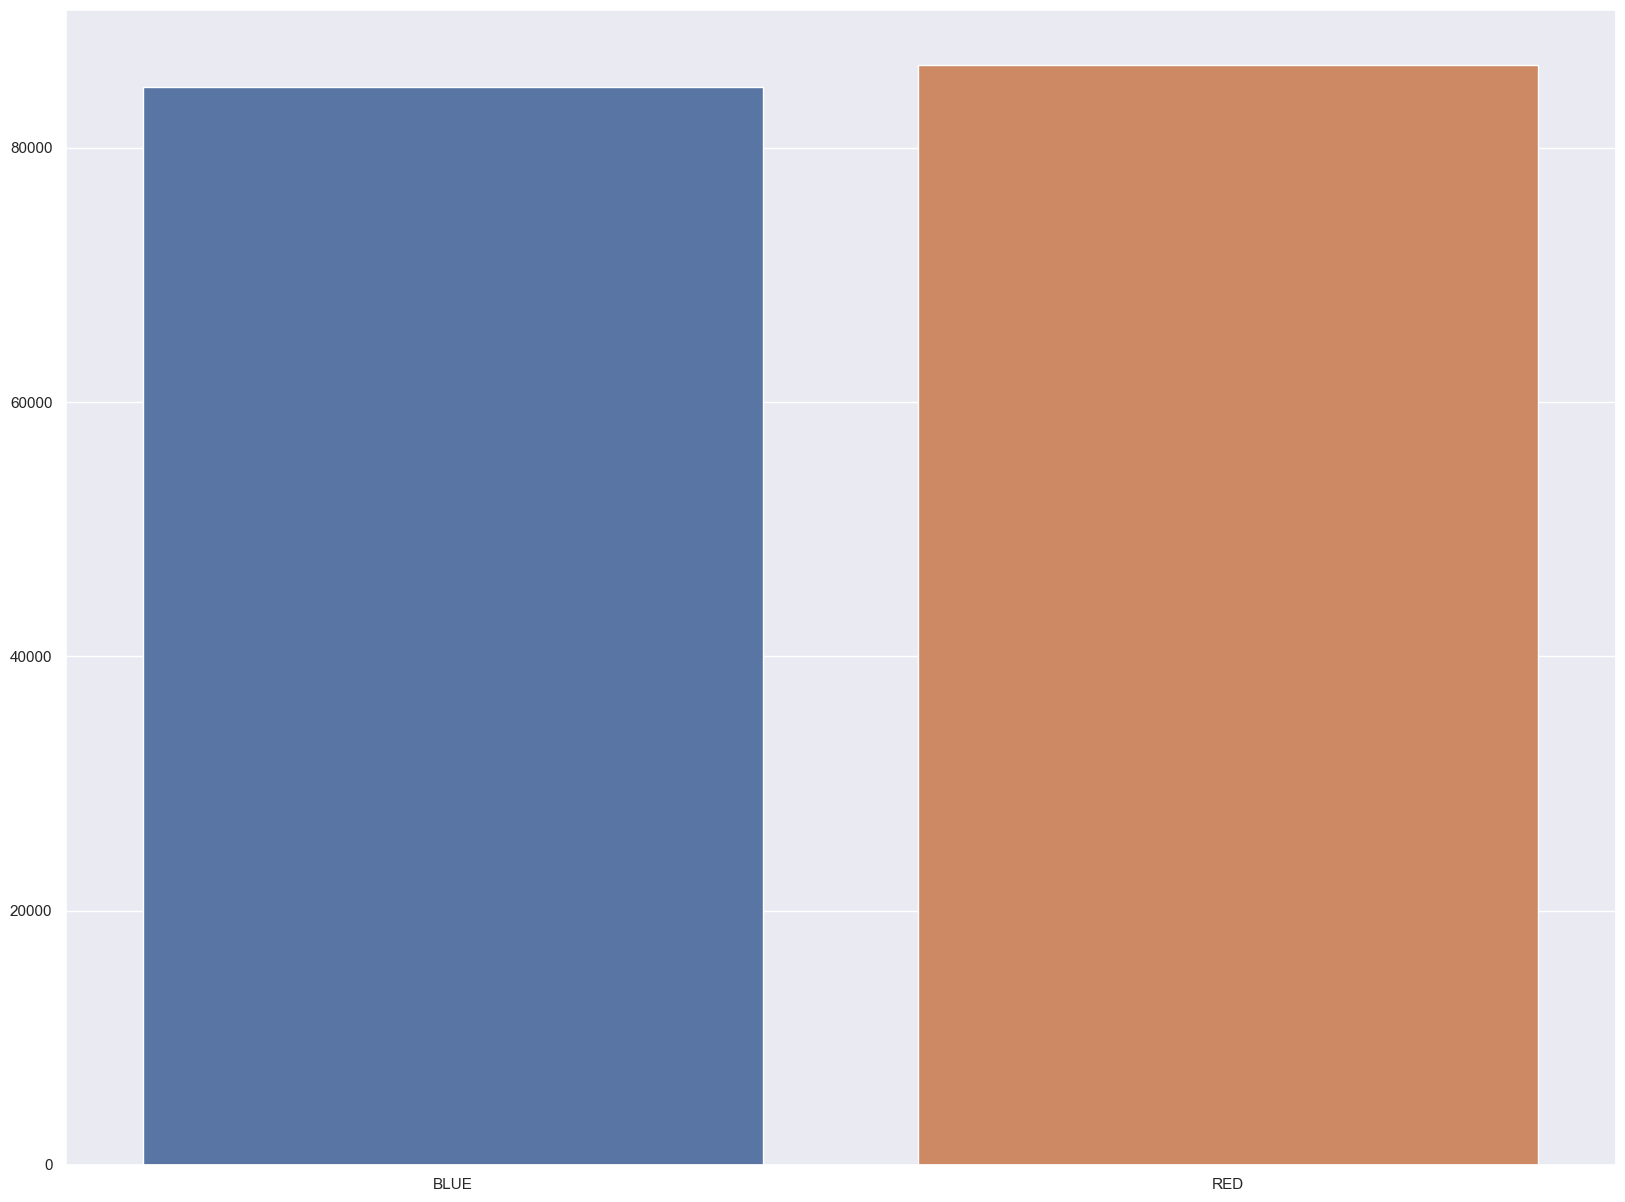

In [52]:
import seaborn as sns

blue_team_wins = df["winner"].value_counts()["BLUE"]
red_team_wins = df["winner"].value_counts()["RED"]

print("Blue team wins: ", blue_team_wins)
print("Red team wins: ", red_team_wins)

sns.barplot(data=df, x=["BLUE", "RED"], y=[df["winner"].value_counts()["BLUE"], df["winner"].value_counts()["RED"]])

### Comparison between kills when red team and blue team wins

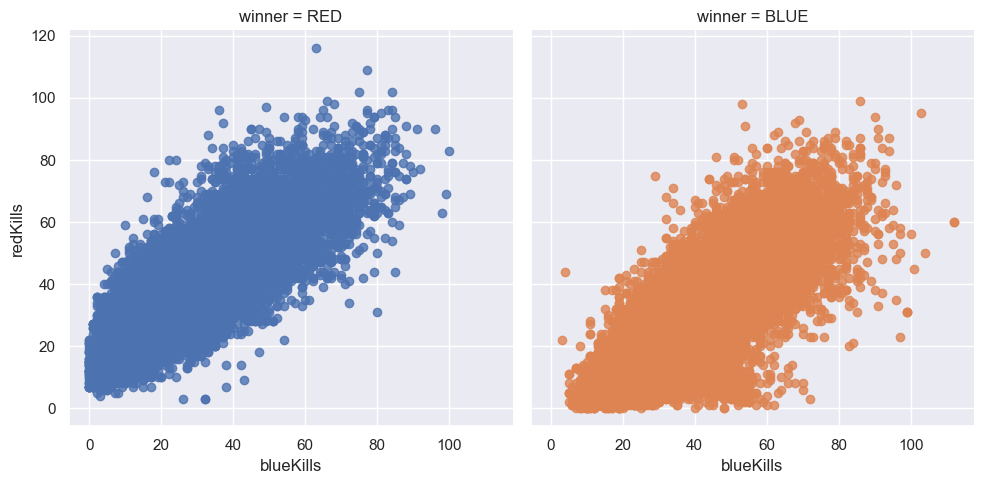

In [53]:
sns.lmplot(x='blueKills', y='redKills', data=df,
          fit_reg=False,
          hue='winner',
          col='winner')

### Comparison between total gold when red team and blue team wins

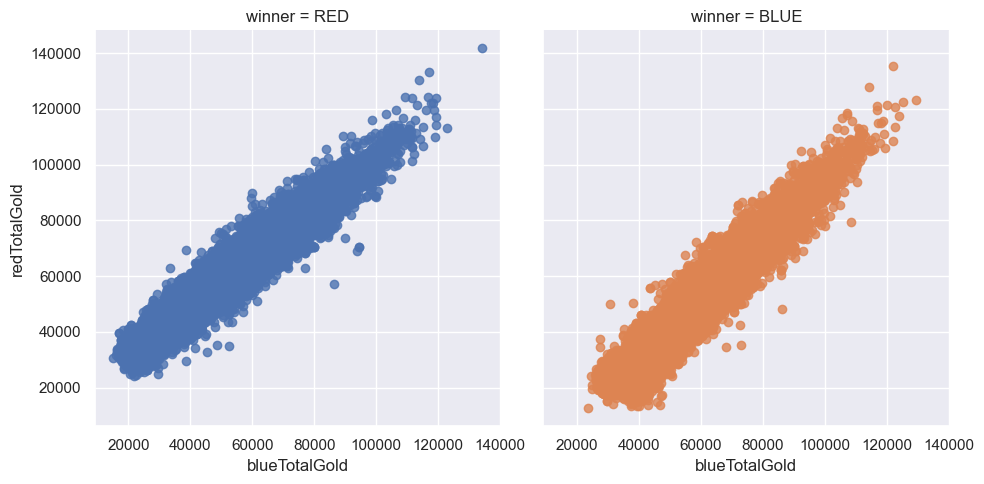

In [54]:
sns.lmplot(x='blueTotalGold', y='redTotalGold', data=df,
          fit_reg=False,
          hue='winner',
          col='winner')

Correlation between attributes, darker color means they are more dependent on each other.

/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_45643/1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

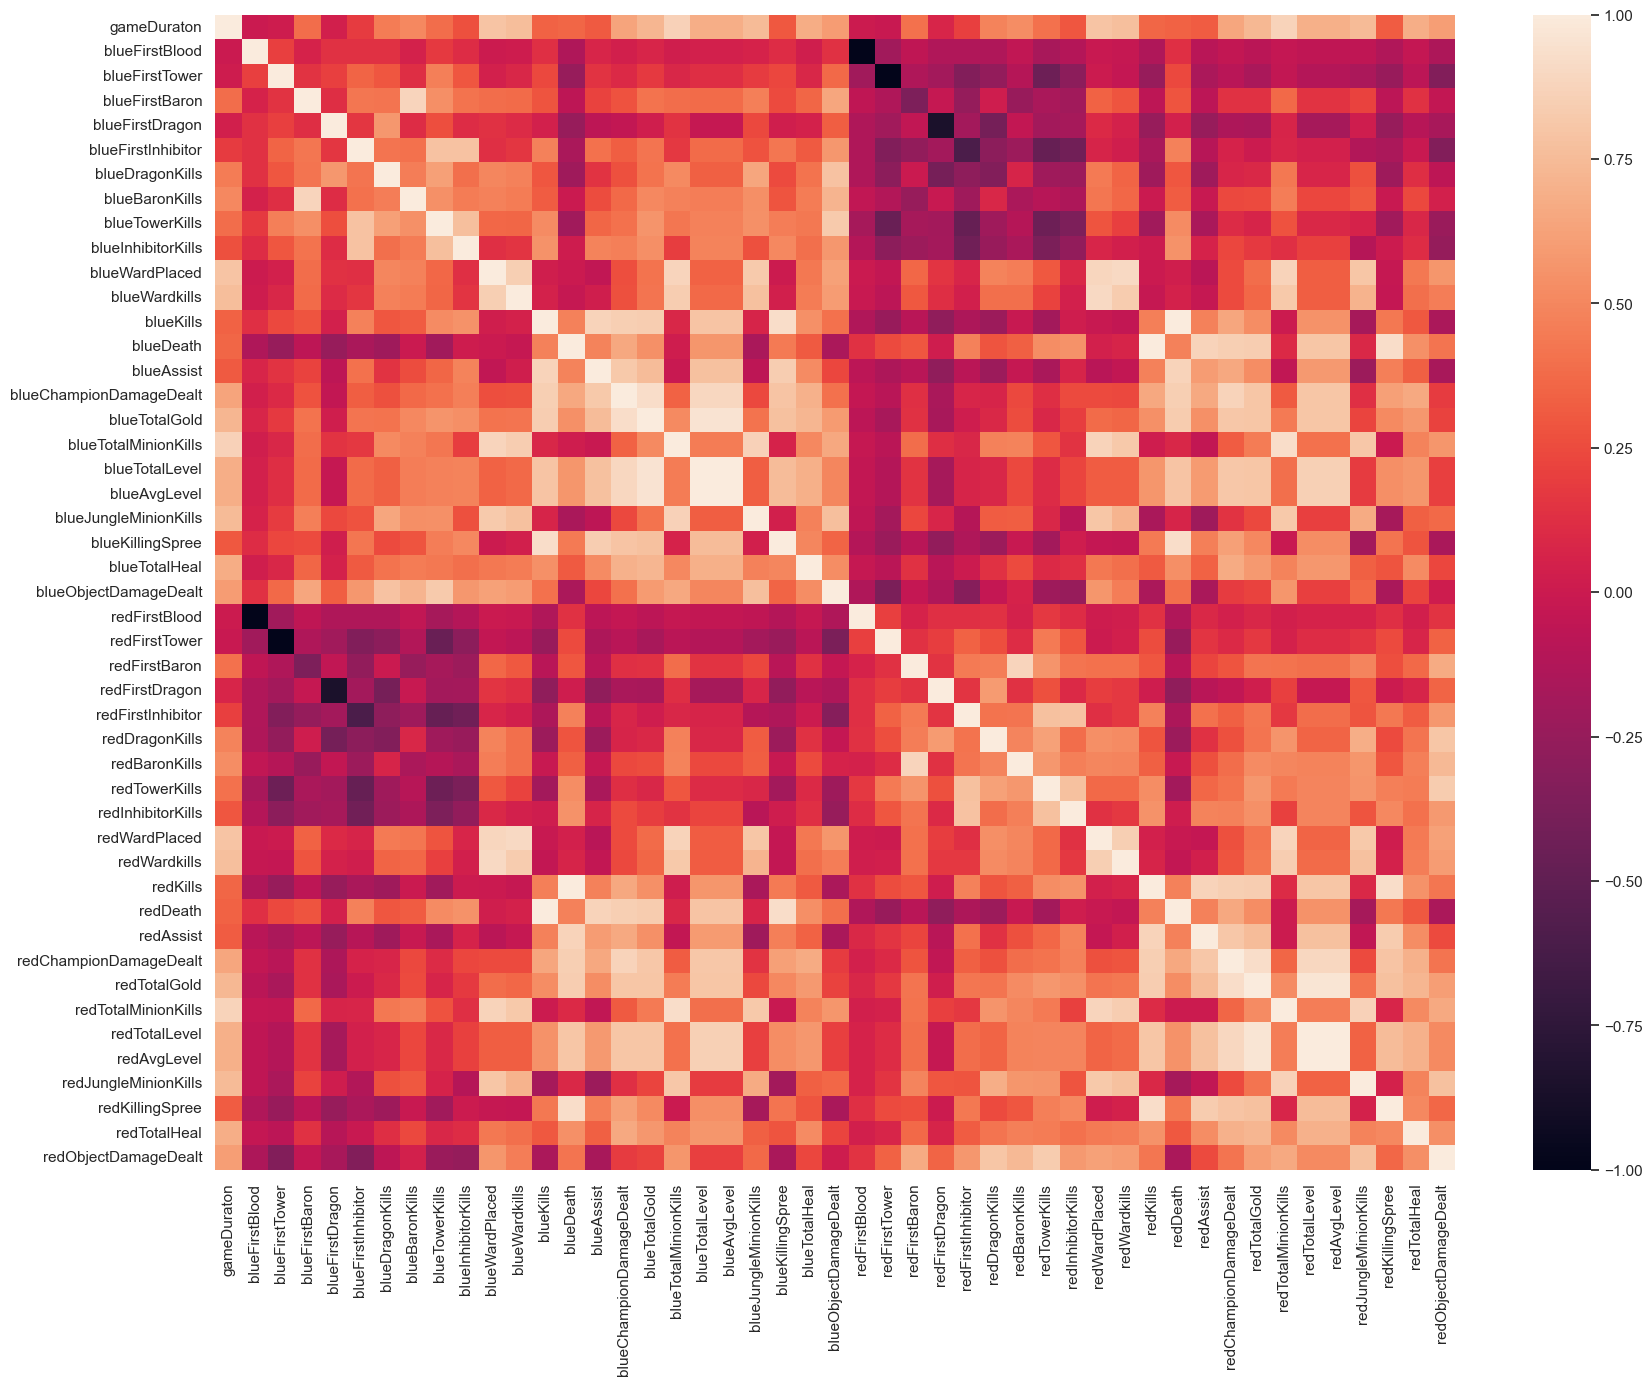

In [55]:
sns.heatmap(df.corr())

In [56]:
from math import ceil

num_of_blue_team_fb = len(df.loc[(df["blueFirstBlood"]) == 1 & (df["winner"] == "BLUE")])
num_of_red_team_fb = len(df.loc[(df["redFirstBlood"] == 1) & (df["winner"] == "RED")])
num_of_games = df.shape[0]

print(f"Number of blue team first bloods: {num_of_blue_team_fb}")
print(f"Number of red team first bloods: {num_of_red_team_fb}")

print(f"Blue team wins {ceil((num_of_blue_team_fb / num_of_games) * 100)}% when the make first blood")
print(f"Red team wins {ceil((num_of_red_team_fb / num_of_games) * 100)}% when the make first blood")

Number of blue team first bloods: 101790
Number of red team first bloods: 50715
Blue team wins 60% when the make first blood
Red team wins 30% when the make first blood


Distribution of blue team kills based of game durations

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
 

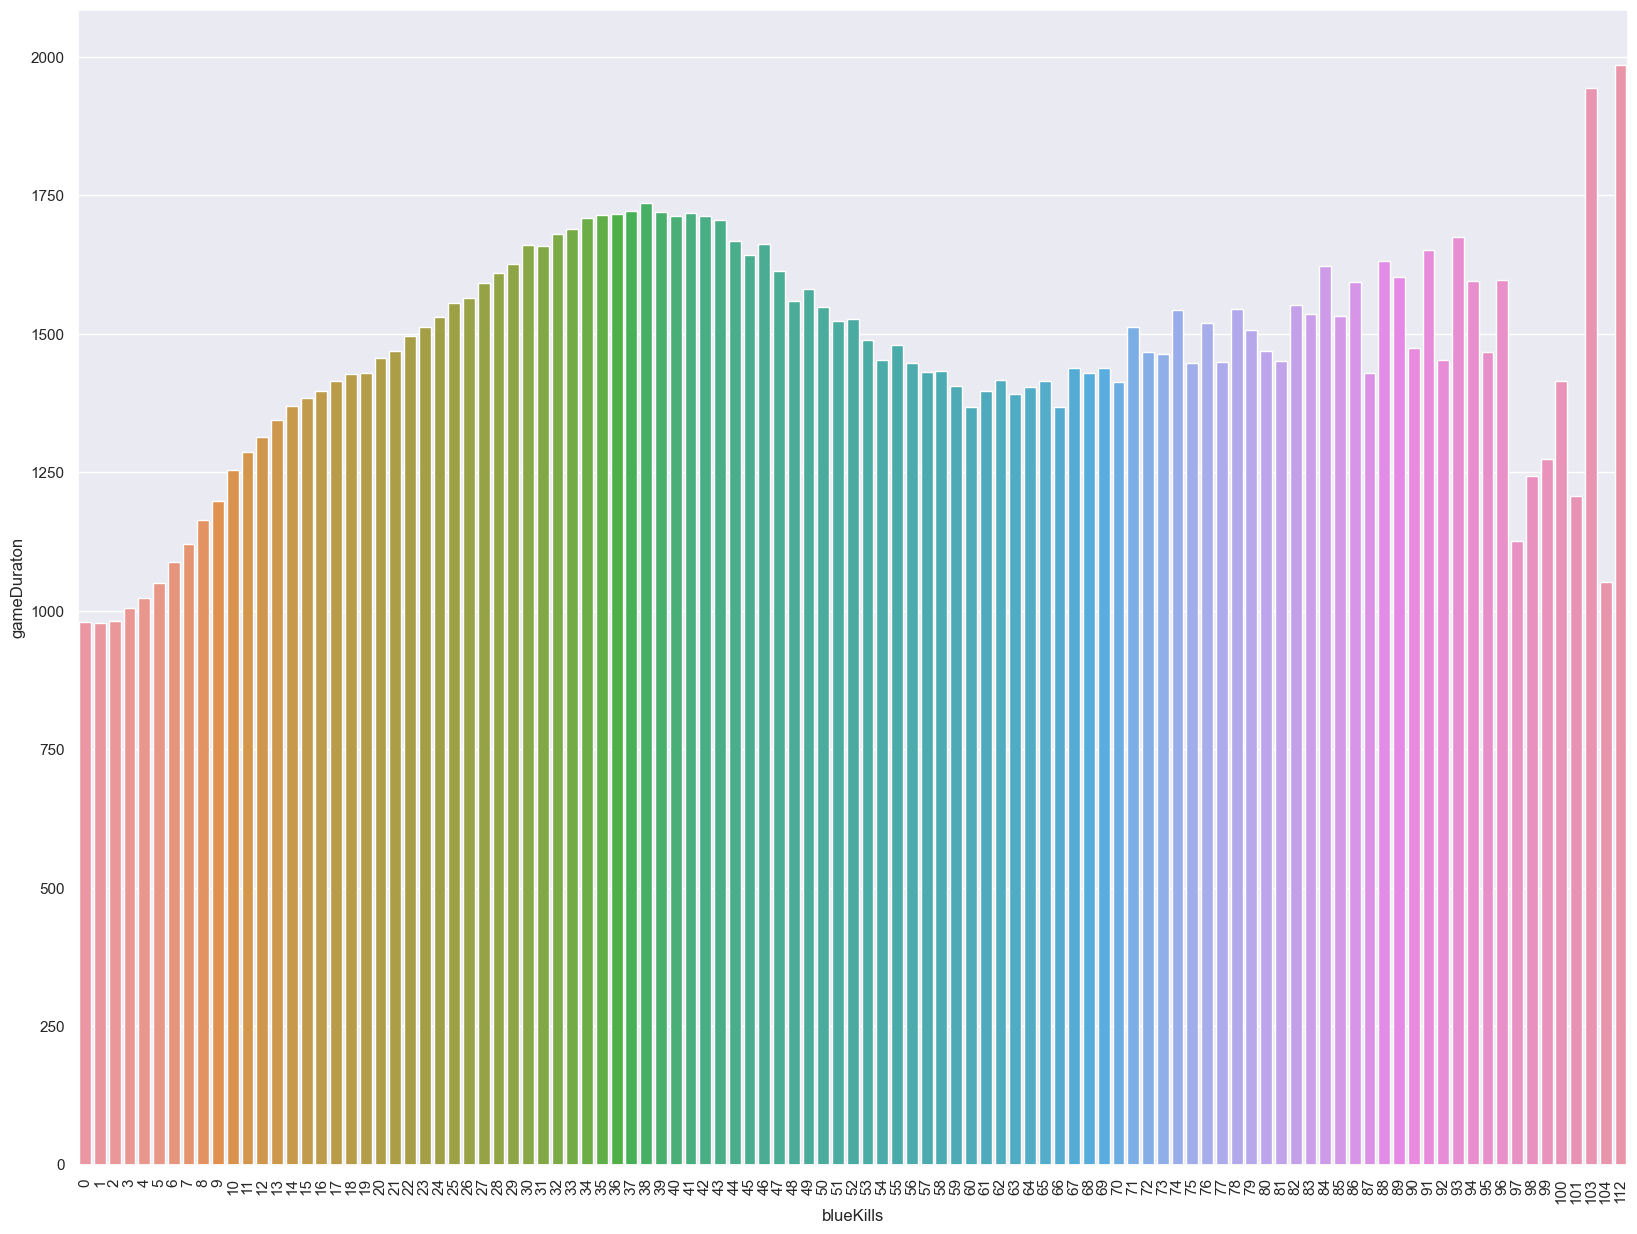

In [57]:
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize': (20, 15)})
sns.barplot(data=df, estimator=np.mean, y="gameDuraton", x="blueKills", errorbar=None)
plt.xticks(rotation=90)

### Standardization of data


We need to standardize our numerical values.

In [58]:
df.dtypes

gameDuraton                  int64
blueFirstBlood               int64
blueFirstTower               int64
blueFirstBaron               int64
blueFirstDragon              int64
blueFirstInhibitor           int64
blueDragonKills              int64
blueBaronKills               int64
blueTowerKills               int64
blueInhibitorKills           int64
blueWardPlaced               int64
blueWardkills                int64
blueKills                    int64
blueDeath                    int64
blueAssist                   int64
blueChampionDamageDealt      int64
blueTotalGold                int64
blueTotalMinionKills         int64
blueTotalLevel               int64
blueAvgLevel               float64
blueJungleMinionKills        int64
blueKillingSpree             int64
blueTotalHeal                int64
blueObjectDamageDealt        int64
redFirstBlood                int64
redFirstTower                int64
redFirstBaron                int64
redFirstDragon               int64
redFirstInhibitor   

In [59]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.loc[:, df.columns != 'winner'].columns
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])
df.head()

,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,winner
0,-0.443577,0.985728,-1.045951,-0.583809,-0.847242,-0.787387,-1.146434,-0.583789,-1.333646,-0.715238,...,0.017173,0.008115,0.014341,-0.214631,-0.214631,0.079554,0.598381,0.834157,0.809484,RED
1,-0.459200,-1.014479,-1.045951,-0.583809,1.180300,-0.787387,0.447264,-0.583789,-0.143988,-0.715238,...,-0.774732,-0.833600,0.251779,-0.603119,-0.603119,0.016413,-0.802919,-0.082470,-0.928327,BLUE
2,-1.461642,-1.014479,-1.045951,-0.583809,-0.847242,-0.787387,-1.146434,-0.583789,-1.333646,-0.715238,...,-1.143791,-0.951079,-0.816692,-1.302398,-1.302398,-0.693917,-0.242399,-0.890676,0.237361,RED
3,1.574325,-1.014479,-1.045951,1.712889,1.180300,-0.787387,-0.349585,1.240127,-0.738817,-0.715238,...,1.470475,1.380211,1.882604,1.339321,1.339321,1.137156,0.878641,2.590618,1.849329,RED
4,2.214847,0.985728,0.956067,1.712889,1.180300,1.270023,0.447264,3.064042,1.937914,2.519109,...,1.626392,1.649909,1.645166,1.417018,1.417018,1.484429,0.318121,3.985103,0.947360,BLUE


# Machine learning

Divide dataframe to train and test sets

In [60]:
X = df[numerical_columns]
y = df["winner"]

Test train split our data

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=789)

Using different classification algorithms on my dataset

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics

classifiers = [DecisionTreeClassifier(), LinearSVC(), KNeighborsClassifier(),
               RandomForestClassifier(), ExtraTreesClassifier()]

accuracy = {}
f1 = {}
precision = {}
recall = {}

for model in classifiers:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy[type(model).__name__] = metrics.accuracy_score(y_test,predictions)
    recall[type(model).__name__] = metrics.recall_score(y_test,predictions,average="macro")
    f1[type(model).__name__] = metrics.f1_score(y_test,predictions, average="macro")
    precision[type(model).__name__] = metrics.precision_score(y_test,predictions, average="macro")

    print(f'{type(model).__name__ : >30} accuracy: {accuracy[type(model).__name__]:1.4f}')
    print(f'{type(model).__name__ : >30} f1: { f1[type(model).__name__]:1.4f}')
    print(f'{type(model).__name__ : >30} recall: { recall[type(model).__name__]:1.4f}')
    print(f'{type(model).__name__ : >30} precision: { precision[type(model).__name__]:1.4f}')

        DecisionTreeClassifier accuracy: 0.9859
        DecisionTreeClassifier f1: 0.9859
        DecisionTreeClassifier recall: 0.9859
        DecisionTreeClassifier precision: 0.9859


/opt/homebrew/Caskroom/miniforge/base/envs/league_of_legneds_ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                     LinearSVC accuracy: 0.9917
                     LinearSVC f1: 0.9917
                     LinearSVC recall: 0.9918
                     LinearSVC precision: 0.9917
          KNeighborsClassifier accuracy: 0.9771
          KNeighborsClassifier f1: 0.9771
          KNeighborsClassifier recall: 0.9771
          KNeighborsClassifier precision: 0.9771
        RandomForestClassifier accuracy: 0.9926
        RandomForestClassifier f1: 0.9926
        RandomForestClassifier recall: 0.9926
        RandomForestClassifier precision: 0.9926
          ExtraTreesClassifier accuracy: 0.9926
          ExtraTreesClassifier f1: 0.9926
          ExtraTreesClassifier recall: 0.9926
          ExtraTreesClassifier precision: 0.9926


### Comparison between different classification algorithms
- Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
- The F1 score is defined as the harmonic mean of precision and recall
- Precision quantifies the number of positive class predictions that actually belong to the positive class.
- Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

## Accuracy

AxesSubplot(0.125,0.11;0.775x0.77)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'LinearSVC'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'ExtraTreesClassifier')])

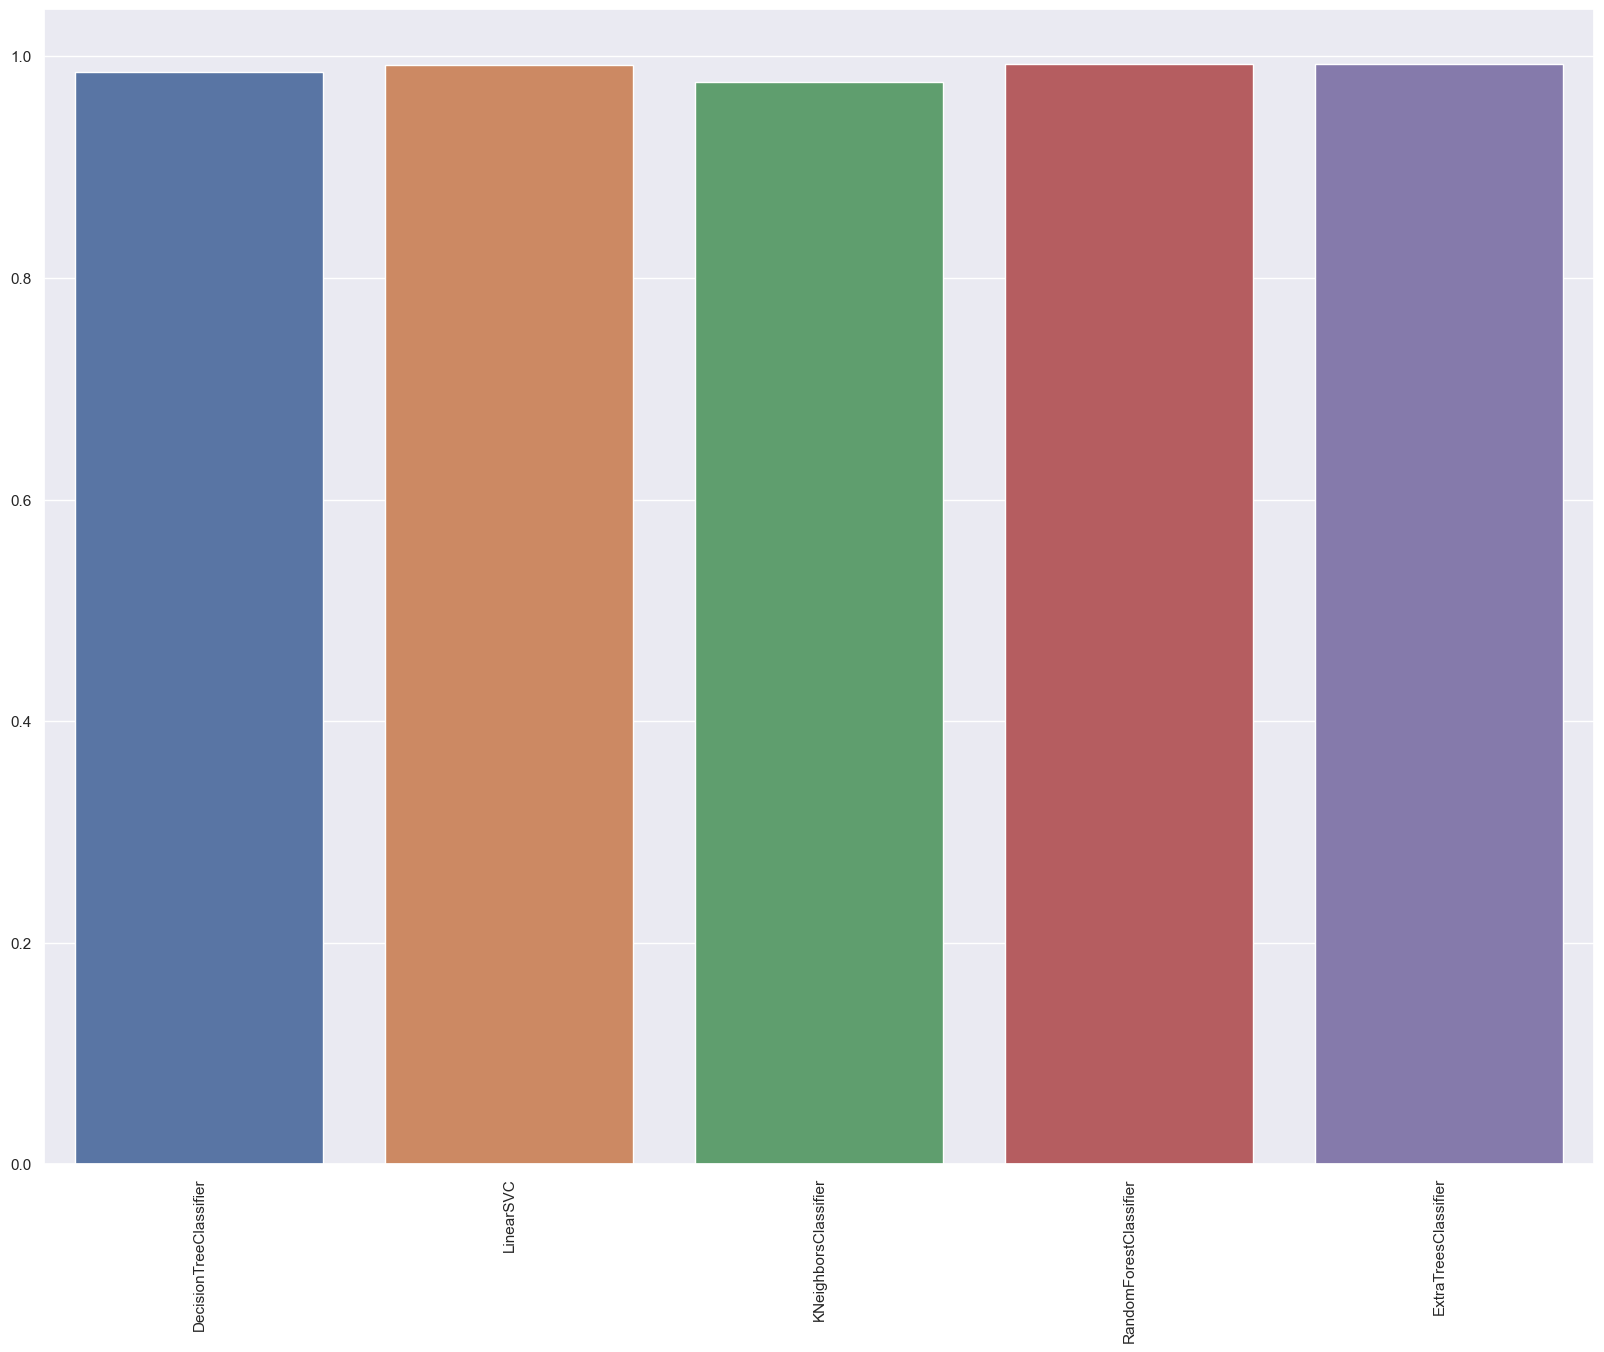

In [63]:
accuracy = pd.DataFrame(accuracy, index=['i', ])
print(sns.barplot(data=accuracy))
plt.xticks(rotation=90)

## F1

AxesSubplot(0.125,0.11;0.775x0.77)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'LinearSVC'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'ExtraTreesClassifier')])

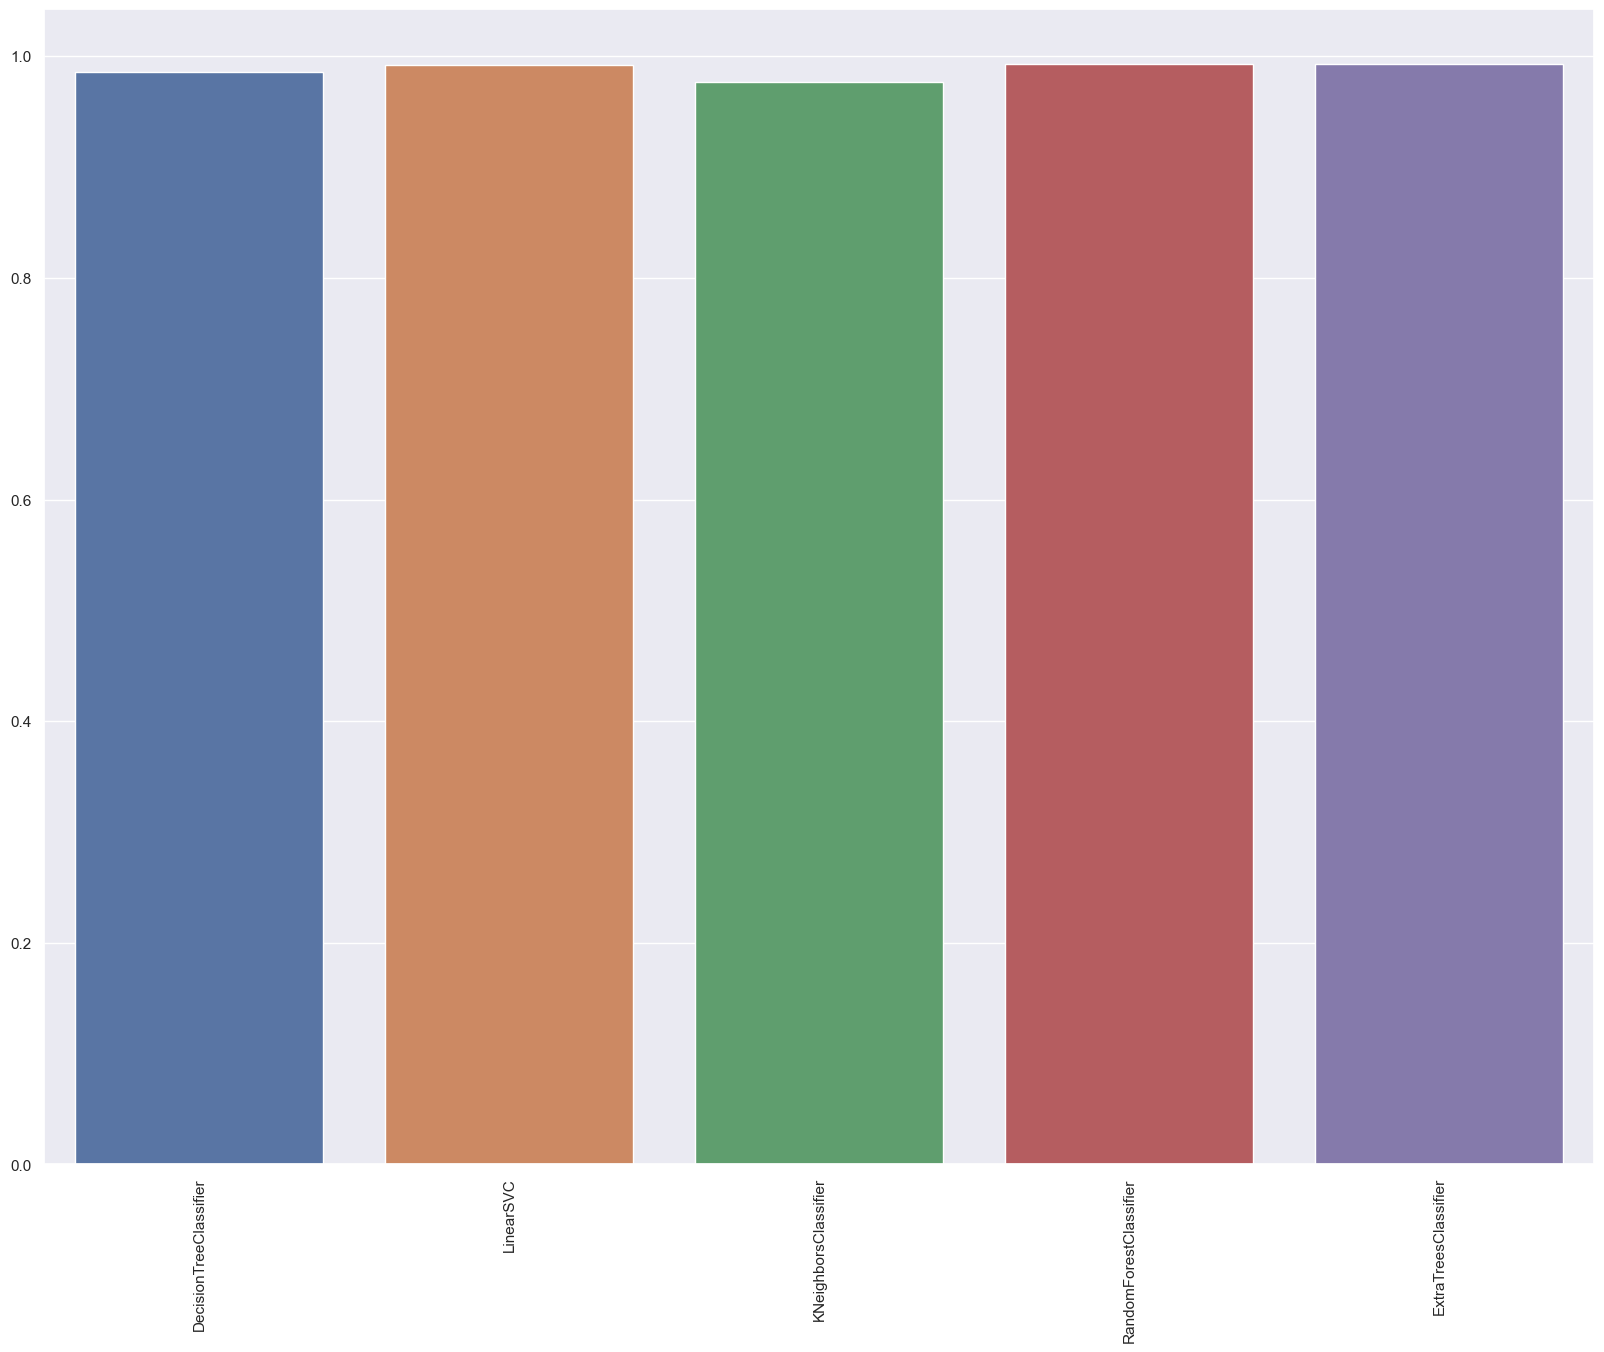

In [64]:
f1 = pd.DataFrame(f1, index=['i', ])
print(sns.barplot(data=f1))
plt.xticks(rotation=90)

## Precision

AxesSubplot(0.125,0.11;0.775x0.77)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'LinearSVC'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'ExtraTreesClassifier')])

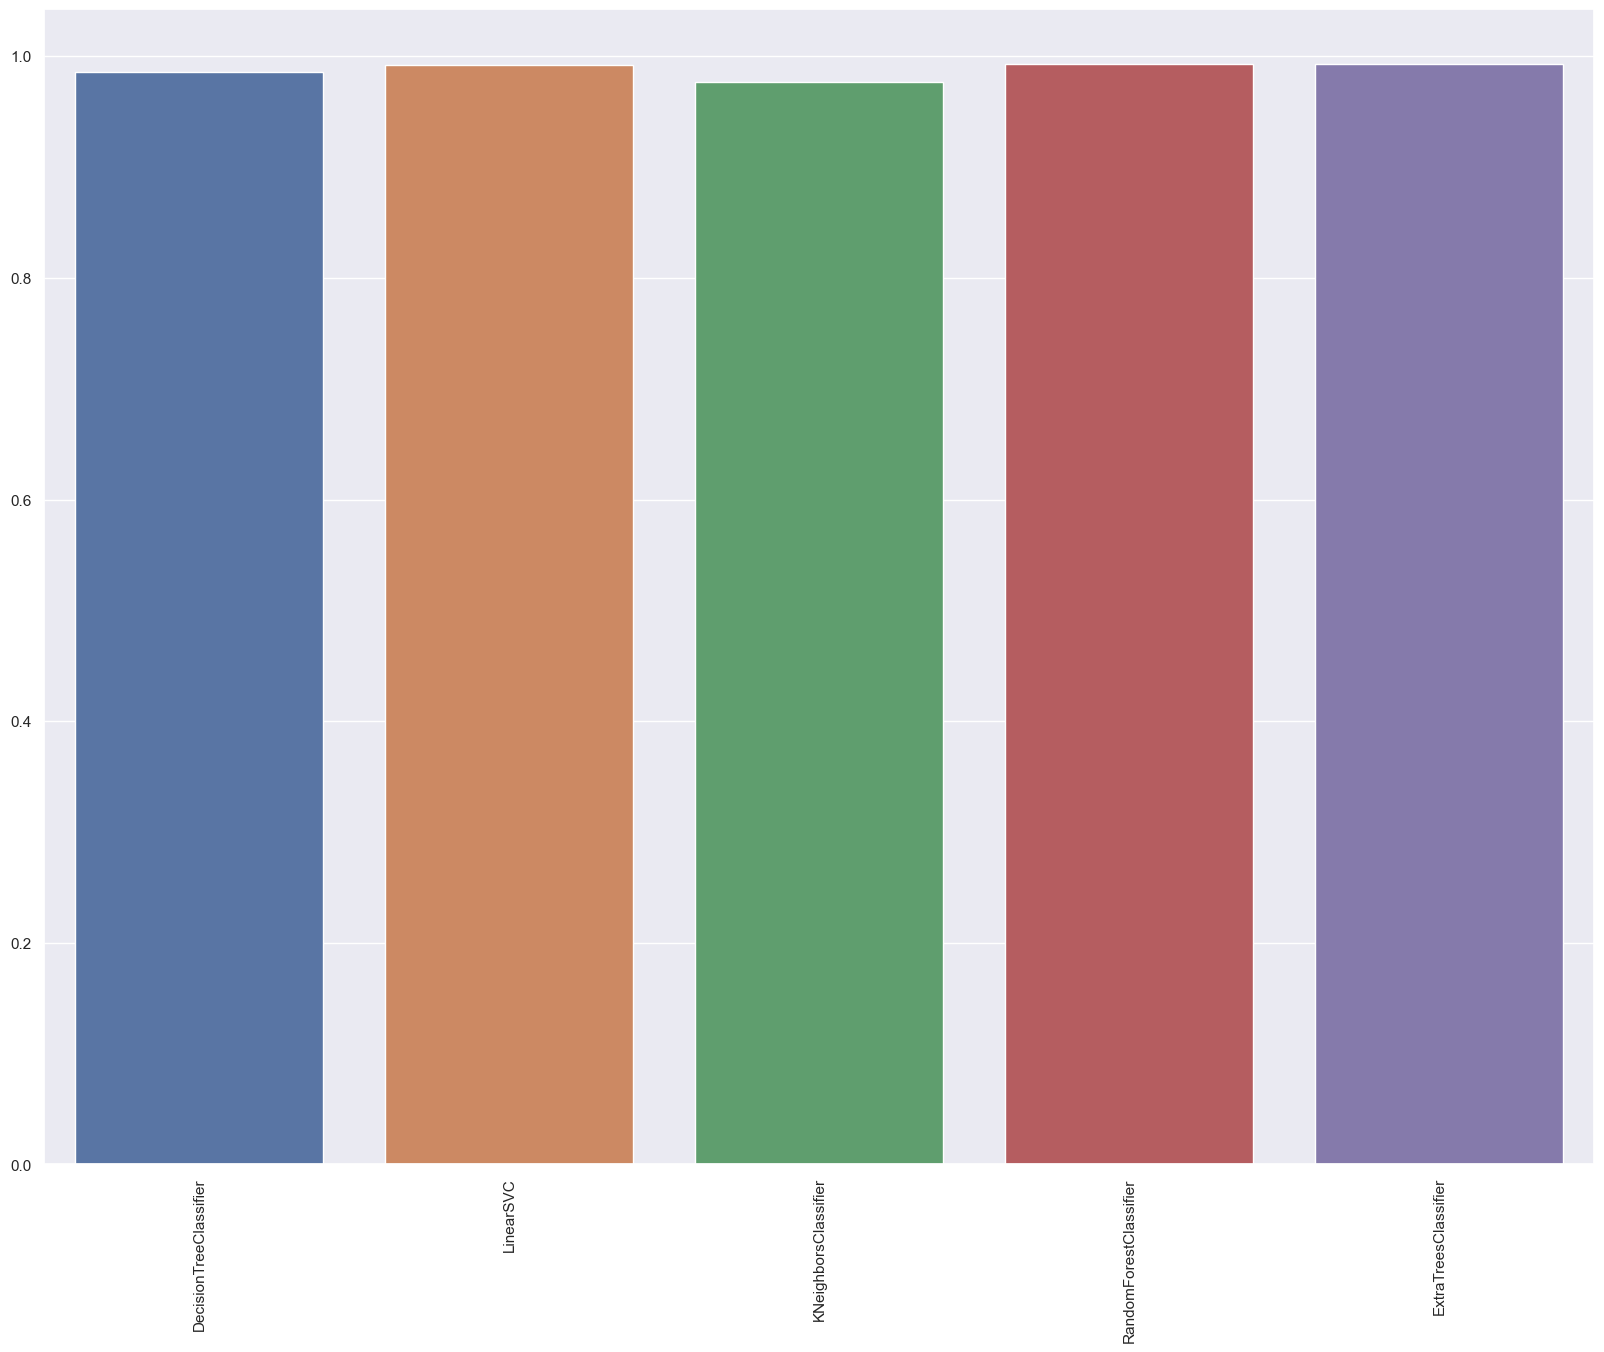

In [65]:
precision = pd.DataFrame(precision, index=['i', ])
print(sns.barplot(data=precision))
plt.xticks(rotation=90)

## Recall

AxesSubplot(0.125,0.11;0.775x0.77)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'LinearSVC'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'ExtraTreesClassifier')])

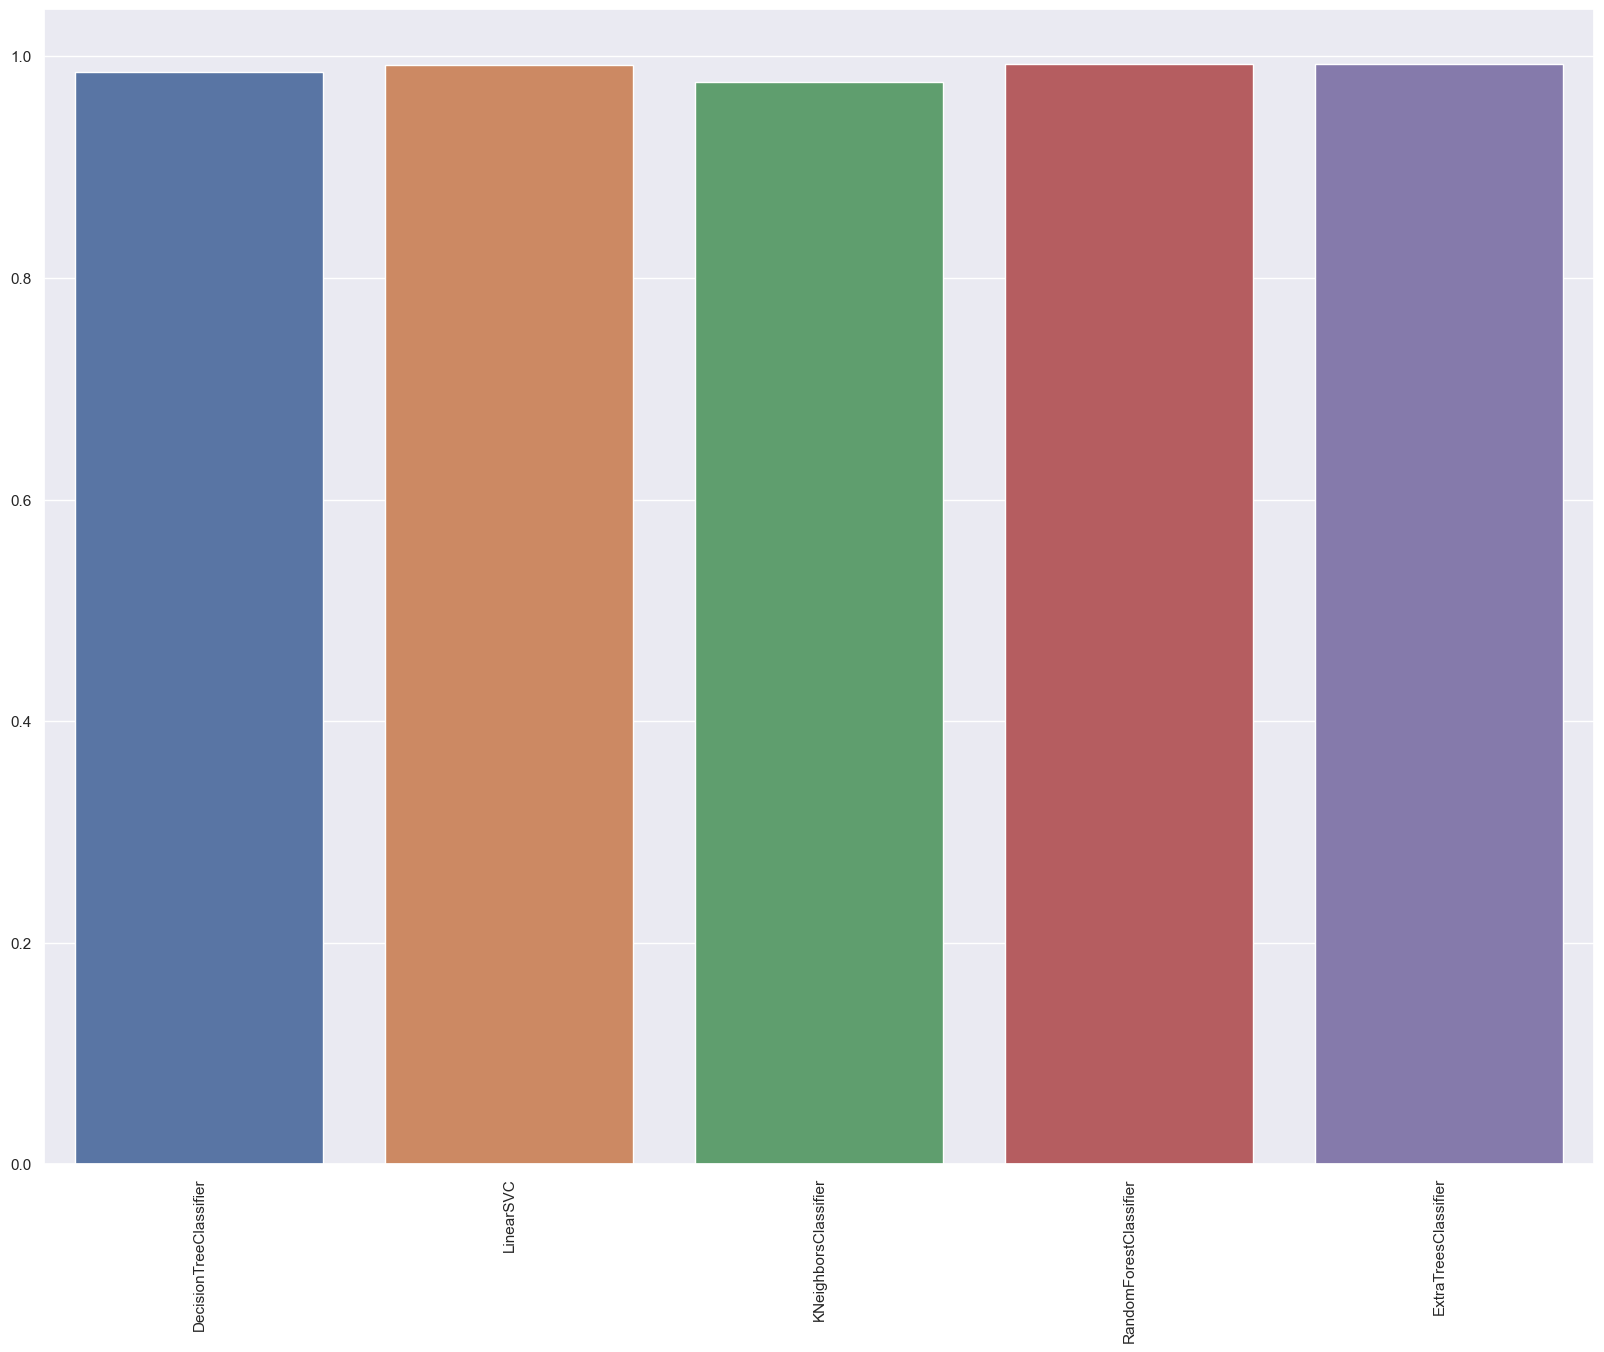

In [66]:
recall = pd.DataFrame(recall, index=['i', ])
print(sns.barplot(data=recall))
plt.xticks(rotation=90)

# Conclusion

In conclusion, the league of legends classification model that predicts which team will win with 99% accuracy is highly effective and reliable. The model's success can be attributed to its use of a comprehensive dataset that includes a wide range of attributes related to team performance. With its high level of accuracy, this model can be used as a valuable tool for predicting the outcome of league of legends matches, helping players and teams make informed decisions and improve their strategies. Overall, the league of legends classification model is a valuable asset for any player or team looking to optimize their chances of victory in the game.



